

<b> Основные шаги </b>:

1.Файл с данными и общая информация

2.Подготовка данных

3.Исследовательский анализ данных

4.Портрет пользователя каждого региона

5.Проверка гипотез

6.Вывод

# 2. Файл с данными  и общая информация

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display


games = pd.read_csv('/datasets/games.csv')

display(games)
print(games.info())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


Вывод: 

1.В названии столбцов присутствует верхний регистр, что неудобно для работы с данными.

2.Нулевые значения есть в столбцах Name, Year_of_release,Genre,Critic_Score,User_Score,Rating.
 
3.Тип данных у числовых столбцов - float, кроме user_score, нужно проверить состав данных.

# 3.Подготовка данных

In [2]:
#1. названия столбцов к нижнему регистру

games.columns = games.columns.str.lower()

#2. обработка пропусков


#2.1 замена пропущенных значений в годах медианой по платформе
games['year_of_release']=games['year_of_release'].fillna(games.groupby('platform')['year_of_release'].transform('median'))

#2.2 удаление строк с пропущенными значениями в названиях игр

games=games.dropna(subset=['name']).reset_index(drop=True)

#замена пропущенных значений  на 0

games['user_score']=games['user_score'].fillna('0')

#3. замена типов данных

games['year_of_release']=games['year_of_release'].astype(int)


#Суммарные продажи во всех регионах

games['all_sales']=games['na_sales']+games['eu_sales']+games['jp_sales']+games['other_sales']



Вывод:

1.Привела название столбцов к нижнему регистру

2.Заменила пропущенные значения в годах выпуска медианой по платформе, так как каждая платформа живет свой срок.

3.Удалила строки с пропущенными значениями в названиях игр, их было всего две, названия восстановить из имеющихся данных невозможно, на анализ данных 2 удаленные строки не повлияют.

4.Оставила пропущенные значения в рейтинге, оценки критиков и оценки пользователей, так как рейтинг и оценка - это субъективные значения, если буду заменять их средними или медианными, не узнаю, насколько точными будут эти данные. В играх выпущенных до 1997 года вообще нет данных о рейтинге и оценках ,скорее всего он тогда даже не существовал.
Пропущенные значения в user_score заменила на 0 для того, чтобы изменить тип данных у столбца, в аналитику не буду брать эти значения.

5.В столбце user_score, помимо числовых значений, есть значение - tbd, что значит - подлежит уточнению, т.е оценки еще нет. Оставляем данное значение как есть, так как неизвестно, на что его можно заменить.

6.Создала столбец all_sales, где посчитала суммарные продажи во всех регионах.

# 4.Исследовательский анализ данных

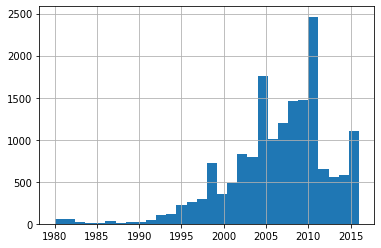

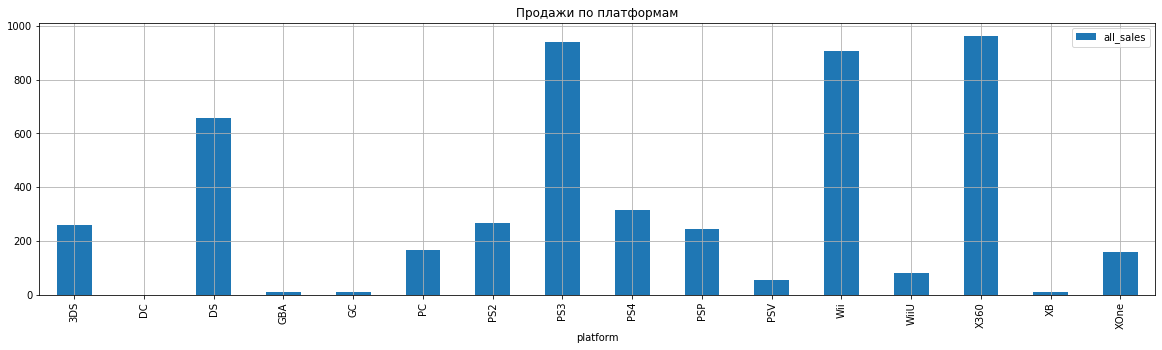

          all_sales
platform           
DC             0.06
GBA            8.68
XB            10.77
GC            11.53
PSV           54.07
WiiU          82.19
XOne         159.32
PC           167.18
PSP          243.15
3DS          259.00
PS2          265.80
PS4          314.14
DS           658.69
Wii          907.51
PS3          939.65
X360         963.17


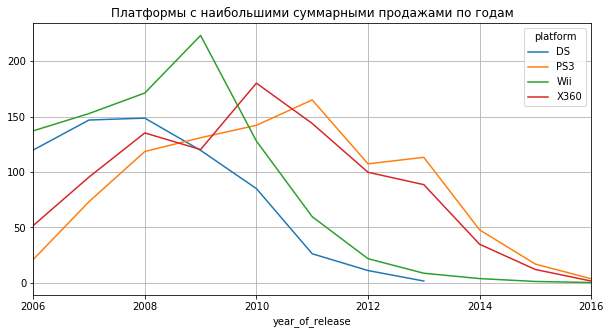

In [3]:
#Сколько игр выпускалось в разные годы

games.groupby('year_of_release')['name'].count()

games['year_of_release'].hist(bins=30)
plt.show()

games['year_of_release'].describe()

#Новый датафрейм с данными с 2006 по 2016 год
games_new=games.query('2006 <= year_of_release <= 2016')

#График продаж по платформам

games_new.groupby('platform').agg({'all_sales' : 'sum'}).reset_index() \
.plot(x='platform',y='all_sales',grid=True,figsize=(20,5), title ='Продажи по платформам',kind='bar')
plt.show()

print(games_new.groupby('platform').agg({'all_sales' : 'sum'}).sort_values(by='all_sales'))

#График платформ с наибольшими суммарными продажами по годам

games_platform = games_new.query('platform == "DS" | platform == "Wii" | platform == "PS3" | platform == "X360"').reset_index(drop=True)


games_platform.pivot_table(index='year_of_release',columns='platform',values='all_sales',aggfunc='sum').plot(grid=True,figsize=(10,5), title ='Платформы с наибольшими суммарными продажами по годам')
plt.show()


Вывод:

1.Исследуя данные в столбце year_of_release , можно сделать вывод, что большинство игр выпустилось после 2006 года. Для дальнейшего анализа буду брать период с 2006 по 2016 год.

2.По графику продаж по платформам, 4 платформы выделяются среди остальных,это платформы - DS, Wii, PS3, X360.

3.Построила график распределения 4х успешных платформ за последние 10 лет по годам, очепвидно, что уже к 2014 году выручка платформ начала падать. В среднем платформы успешны 4 года, потом на смену приходят новые. Значит в 2016 году были уже новые платформы, выручка которых была больше самых успешных платформ за 10 лет.

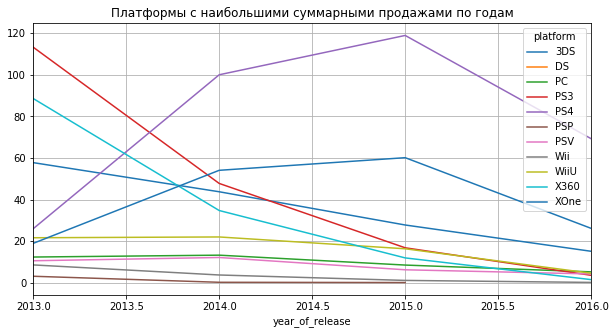

In [4]:
games_actually=games.query('2013 <= year_of_release <= 2016')

#График выручки платформ за актуальный период -  последние 3 года.
games_actually.pivot_table(index='year_of_release',columns='platform',values='all_sales',aggfunc='sum').plot(grid=True,figsize=(10,5), title ='Платформы с наибольшими суммарными продажами по годам')
plt.show()


Вывод: Чтобы дать прогноз на 2017 год, построила график выручки платформ за последние 3 года.
По продажам лидируют платформы - PS4, XOne.

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


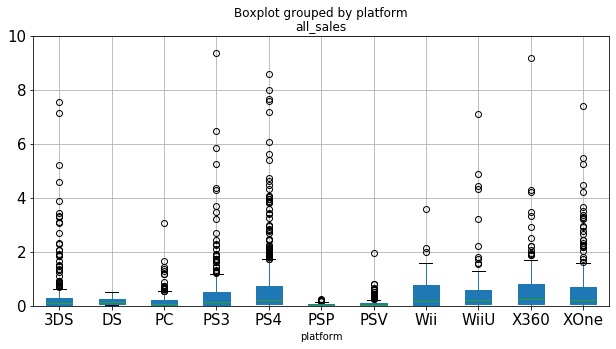

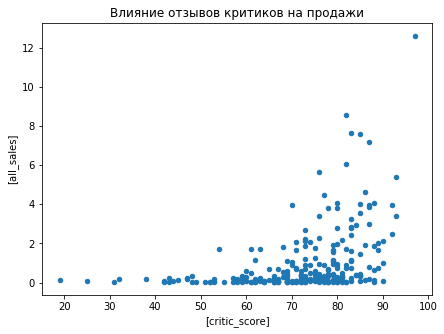

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


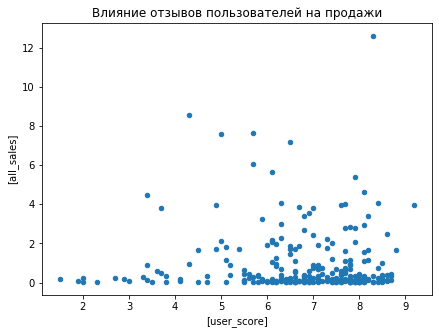

0.31379951637393433
-0.0021577665187643086


In [5]:
#график «ящик с усами» по глобальным продажам игр в разбивке по платформам
import warnings

games_actually.boxplot(column=['all_sales'],by='platform',figsize=(10,5), fontsize=15,patch_artist=True )
plt.ylim(0,10) 

#Влияние отзывов критиков на продажи на примере PS4

games_actually.query("platform == 'PS4'").plot(figsize=(7,5),x =['critic_score'], y = ['all_sales'], kind='scatter',title ='Влияние отзывов критиков на продажи')
plt.show()

games_score=games_actually.query('user_score != "tbd" and user_score != "0"')

games_score['user_score']=games_score['user_score'].astype(float)

#Влияние отзывов пользователей на продажи на примере PS4
games_score.query("platform == 'PS4'").plot(figsize=(7,5),x =['user_score'], y = ['all_sales'], kind='scatter',title ='Влияние отзывов пользователей на продажи')
plt.show()

#корреляцию между отзывами и продажами.

print(games_actually['critic_score'].corr(games_actually['all_sales']))
print(games_score['user_score'].corr(games_score['all_sales']))

warnings.simplefilter('ignore')

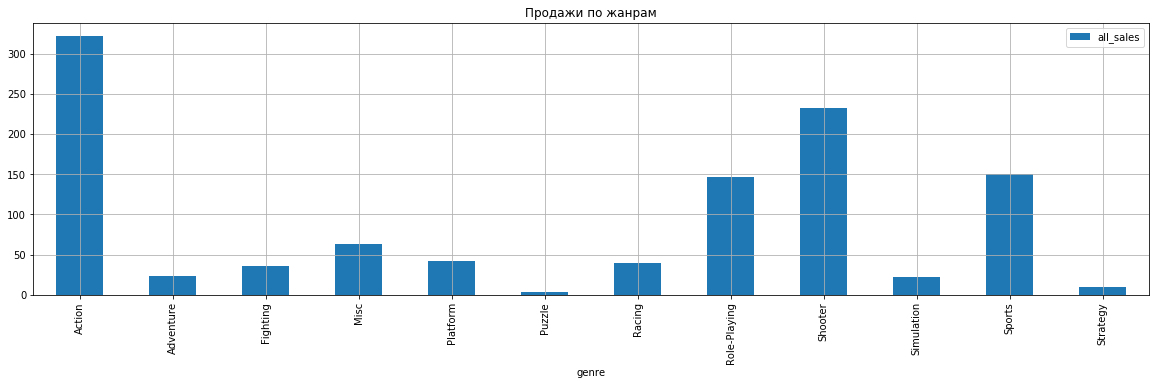

3DS     9
WiiU    4
PSV     2
PS4     1
PS3     1
Name: platform, dtype: int64

In [6]:

#График распределения продаж по жанрам

games_actually.groupby('genre').agg({'all_sales' : 'sum'}).reset_index() \
.plot(x='genre',y='all_sales',grid=True,figsize=(20,5), title ='Продажи по жанрам',kind='bar')
plt.show()

#На каких платформах выпускался самый продаваемый жанр и жанр с самыми низкими продажами

games_actually.query('genre == "Action"')['platform'].value_counts()

games_actually.query('genre == "Puzzle"')['platform'].value_counts()


1. Построила график распределения продаж по жанрам, самый продаваемый жанр - Action, самый непопулярный жанр - Puzzle.
2. Лидирующие платформы, на которых выпускается жанр Action - PS4, PSV, 3DC, XOne, X360.

# 5.Портрет пользователя каждого региона

  region   1.    2.    3.    4.    5.
0     EU  PS4   PS3  XOne  X360   3DS
1     NA  PS4  XOne  X360   PS3   3DS
2     JP  3DS   PS3   PSV   PS4  WiiU


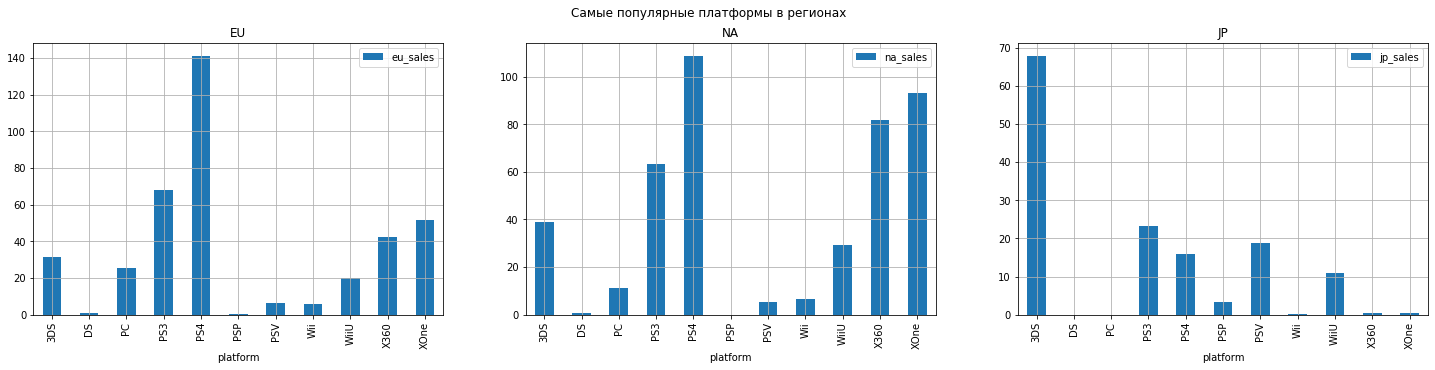

In [7]:
#Самые популярные платформы

fig = plt.figure(figsize = (30,10))
fig.suptitle('Самые популярные платформы в регионах')
ax_1 = fig.add_subplot(1, 3, 1)
ax_2 = fig.add_subplot(1, 3, 2)
ax_3 = fig.add_subplot(1, 3, 3)

games_actually.groupby('platform').agg({'eu_sales' : 'sum'}).reset_index().plot(ax=ax_1,x='platform',y='eu_sales',grid=True,figsize=(25,5), title ='EU',kind='bar')
games_actually.groupby('platform').agg({'na_sales' : 'sum'}).reset_index().plot(ax=ax_2,x='platform',y='na_sales',grid=True,figsize=(25,5), title ='NA',kind='bar')
games_actually.groupby('platform').agg({'jp_sales' : 'sum'}).reset_index().plot(ax=ax_3,x='platform',y='jp_sales',grid=True,figsize=(25,5), title ='JP',kind='bar')

top_platform=pd.DataFrame({'region':['EU','NA','JP'],
                        '1.': ['PS4', 'PS4', '3DS'],
                        '2.': ['PS3', 'XOne', 'PS3'],
                        '3.':['XOne','X360','PSV'],
                        '4.':['X360', 'PS3', 'PS4'],
                        '5.':['3DS','3DS','WiiU'] }) 

print(top_platform)

Вывод: Вывела таблицу с ТОП-5 платформ в регионах. Лидируют платформы от PlayStation и Xbox.
При этом предпочтения пользователей в Японии сильно отличаются от пользователей Северной Америки и Европы. В северной Америке и в Европе на первом месте PS4, на 5ом платформа 3DS, в Японии 3DS занимает первое место, а PS4 четвертое.

  region            1.       2.      3.            4.       5.
0     EU        Action  Shooter  Sports  Role-Playing     Misc
1     NA        Action  Shooter  Sports  Role-Playing     Misc
2     JP  Role-Playing   Action    Misc      Fighting  Shooter


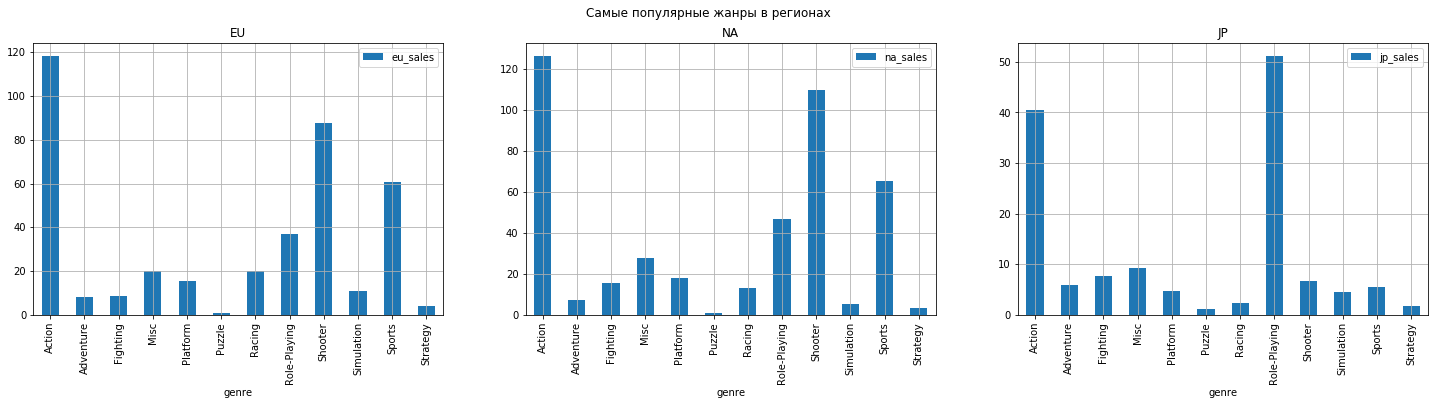

In [8]:
#Самые популярные жанры

fig2 = plt.figure(figsize = (30,10))
fig2.suptitle('Самые популярные жанры в регионах')
ax_4 = fig2.add_subplot(1, 3, 1)
ax_5 = fig2.add_subplot(1, 3, 2)
ax_6 = fig2.add_subplot(1, 3, 3)

games_actually.groupby('genre').agg({'eu_sales' : 'sum'}).reset_index().plot(ax=ax_4,x='genre',y='eu_sales',grid=True,figsize=(25,5), title ='EU',kind='bar')
games_actually.groupby('genre').agg({'na_sales' : 'sum'}).reset_index().plot(ax=ax_5,x='genre',y='na_sales',grid=True,figsize=(25,5), title ='NA',kind='bar')
games_actually.groupby('genre').agg({'jp_sales' : 'sum'}).reset_index().plot(ax=ax_6,x='genre',y='jp_sales',grid=True,figsize=(25,5), title ='JP',kind='bar')


top_genre=pd.DataFrame({'region':['EU','NA','JP'],
                        '1.': ['Action', 'Action', 'Role-Playing'],
                        '2.': ['Shooter', 'Shooter', 'Action'],
                        '3.':['Sports','Sports','Misc'],
                        '4.':['Role-Playing', 'Role-Playing', 'Fighting'],
                        '5.':['Misc','Misc','Shooter'] }) 

print(top_genre)

Вывод: Вывела таблицу топ 5 жанров в регионах. Предпочтения пользователей в Северной Америке и в Европе одинаковые, первое место занимает жанр Action, в Японии предпочтения различаются, первое место - Role-Playing, при этом Action на 4ом.

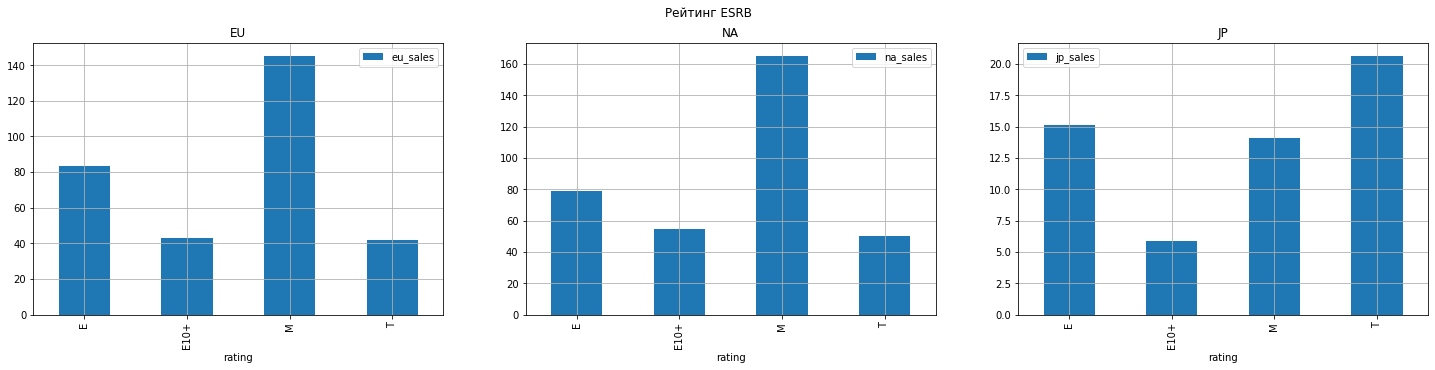

In [9]:
#Влияет ли рейтинг ESRB на продажи в отдельном регионе?

fig3 = plt.figure(figsize = (30,10))
fig3.suptitle('Рейтинг ESRB')
ax_7 = fig3.add_subplot(1, 3, 1)
ax_8 = fig3.add_subplot(1, 3, 2)
ax_9 = fig3.add_subplot(1, 3, 3)

games_actually.groupby('rating').agg({'eu_sales' : 'sum'}).reset_index().plot(ax=ax_7,x='rating',y='eu_sales',grid=True,figsize=(25,5), title ='EU',kind='bar')
games_actually.groupby('rating').agg({'na_sales' : 'sum'}).reset_index().plot(ax=ax_8,x='rating',y='na_sales',grid=True,figsize=(25,5), title ='NA',kind='bar')
games_actually.groupby('rating').agg({'jp_sales' : 'sum'}).reset_index().plot(ax=ax_9,x='rating',y='jp_sales',grid=True,figsize=(25,5), title ='JP',kind='bar')

Вывод: вывела графики влияния рейтинга ESRB на продажи в регионах. В Северной Америке и в Европе лидирует рейтинг M( Для взрослых). В Японии самые высокие продажи у игр с рейтингом T(Подросткам).

# 6.Проверка гипотез

In [10]:
#H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
#H1: Средние пользовательские рейтинги платформ Xbox One и PC разные

xbox= games_score.query('platform == "X360" | platform == "XOne"')

pc = games_score.query('platform == "PC"')

from scipy.stats import bartlett
from scipy import stats as st

stat, p = bartlett(xbox['user_score'],pc['user_score'])

print(p)

alpha = 0.05  # критический уровень статистической значимости

results = st.ttest_ind(xbox['user_score'], pc['user_score'], equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Подтверждаем гипотезу Н1')
else:
    print('Подтверждаем гипотезу Н0') 
    

0.03469657498006525
p-значение: 0.9061348561697553
Подтверждаем гипотезу Н0


Вывод: провела тест Бартлетта, для сравнений дисперсий выборок, значение p маленькое, буду предпологать, что совокупности имеют разные дисперсии, значит параметр equal_var = False.

Подтверждаем нулевую гипотезу: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

In [11]:
#H0: Средние пользовательские рейтинги жанров Action и Sports однаковые
#H1: Средние пользовательские рейтинги жанров Action и Sports разные

action= games_score.query('genre == "Action"')
sports = games_score.query('genre == "Sports"')

from scipy.stats import bartlett
from scipy import stats as st

stat, p = bartlett(action['user_score'],sports['user_score'])
print(p)

alpha = 0.05  # критический уровень статистической значимости

results = st.ttest_ind(action['user_score'], sports['user_score'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Подтверждаем гипотезу Н1')
else:
    print('Подтверждаем гипотезу Н0') 

4.695019028537939e-06
p-значение: 9.645978111716946e-28
Подтверждаем гипотезу Н1


Вывод: провела тест Бартлетта, для сравнений дисперсий выборок, значение p большое, буду предпологать, что совокупности имеют одинаковые дисперсии, значит параметр equal_var оставляем по умолчанию.

Подтверждаем альтернативную гипотезу: Средние пользовательские рейтинги жанров Action и Sports разные.

# 7. Общий вывод

Для того, чтобы сделать ставку на потенциально популярный продукт и спланировать рекламные компании, в ходе исследования  выявлены определяющие успешность игры закономерности:
1.Игровая платформа
2.Оценка пользователя
3.Оценка критика
4.Жанр
5.ESRB рейтинг

В ходе предобработки данных для анализа были взяты актуальные данные за 2013-2016 год.
В разных регионах разные критерии определяющие успешность игры.

<b>Платформа</b>
Самые прибыльные платформы в Северной Америке и в Европе - PS4,PS3,  XOne, X360, 3DS.
Самые прибыльные платформы в Японии - 3DS, PS3, PSV, PS4,WiiU.

<b>Оценка пользователя</b>
Корреляция между оценкой пользователя и продажами слабая, этот показатель не стоит брать за основной, так как оценка субъективная у каждого пользователя, а предпочтения пользователей в разных регионах разные.

<b>Оценка критика</b>
Корреляция между оценкой критикой и продажами высокая. Чем выше оценка критика - тем выше продажи.

<b>Жанр </b>
Самые прибыльные жанры в Северной Америке и в Европе - Action, Shooter, Sports,Role-Playing, Misc.
Самые прибыльные жанры в Японии - Role-Playing, Action, Misc, Fighting, Shooter.

<b> ESRB рейтинг </b>
В Северой Америке и в Европе самые прибыльные игры с рейтингом - Для взрослых.
В Японии - для подростков.